In [1]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time

In [2]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, 2000, 20))


In [3]:
importlib.reload(md)

<module 'models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [4]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

It took 180.10606288909912 seconds.


Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

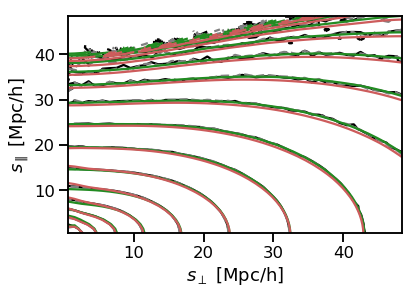

In [13]:
s_c = rs[0].measured.s_c
levels = np.arange(-4, 1, 0.3)


colors = [mean_rs.measured.color] * len(levels)
plt.contour(s_c, s_c, 
            np.log10(mean_rs.measured.pi_sigma.mean).T, 
            levels=levels, colors=colors)

colors = [mean_rs.streaming.color] * len(levels)
plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
            np.log10(mean_rs.streaming.pi_sigma).T,
           levels=levels, colors=colors, linestyles='dashed')

colors = [mean_rs.gaussian.color] * len(levels)

plt.contour(mean_rs.gaussian.s_c, mean_rs.gaussian.s_c,
            np.log10(mean_rs.gaussian.pi_sigma).T,
           levels=levels, colors=colors)


colors = [mean_rs.skewt.color] * len(levels)

plt.contour(mean_rs.skewt.s_c, mean_rs.skewt.s_c,
            np.log10(mean_rs.skewt.pi_sigma).T,
           levels=levels, colors=colors)

#plt.xlim(0,30)

#plt.ylim(0,30)

plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

In [14]:
import importlib
importlib.reload(pt)

<module 'CentralStreamingModel.utils.plot_tools' from '/home/c-cuesta/CentralStreamingModel/utils/plot_tools.py'>

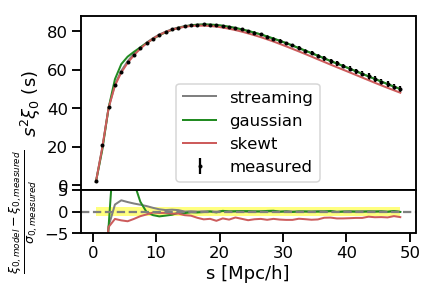

In [15]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


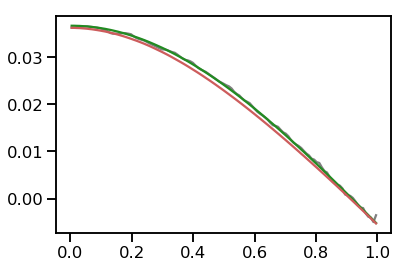

In [16]:
# Monopole integrand
s = 48
integrand = mean_rs.streaming.s_mu[s,:]
mu = np.linspace(0.,1.,120)
mu_c = 0.5 * (mu[1:] + mu[:-1])
plt.plot(mu_c, mean_rs.streaming.s_mu[s,:], color=mean_rs.streaming.color)
plt.plot(mu_c, mean_rs.gaussian.s_mu[s,:], color=mean_rs.gaussian.color)
plt.plot(mu_c, mean_rs.skewt.s_mu[s,:], color=mean_rs.skewt.color)

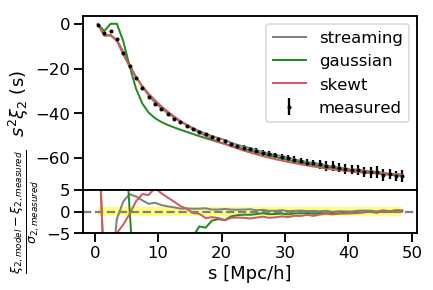

In [17]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')


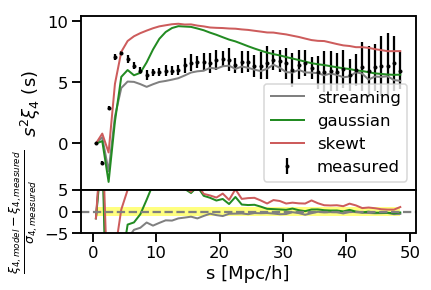

In [18]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


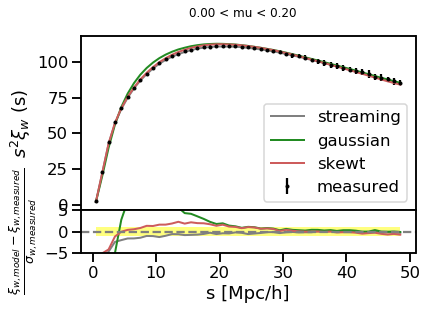

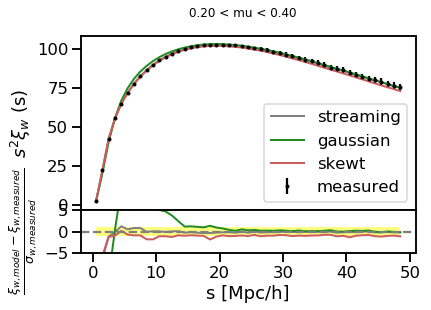

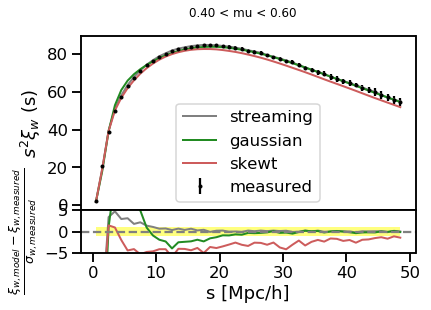

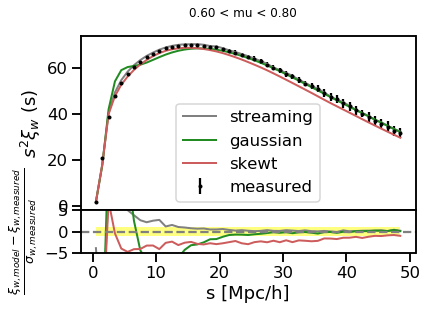

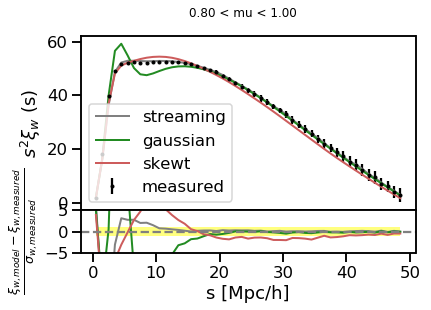

In [19]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

AttributeError: 'Gaussian' object has no attribute 'int_r_parallel'

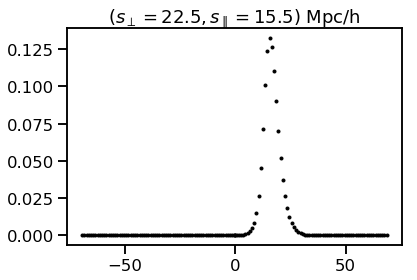

In [20]:
s = 30
mu = 0.5
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.axvline(x = s*mu, color='black', linestyle='--')

plt.xlim(0, 40)

In [ ]:
check_r_parallel = [5,10, 13,s*mu,17,20,28]

for crp in check_r_parallel:
    v_los = mean_rs.per_box_list[0].measured.v_los

    sample_skewt = np.zeros_like(v_los)

    for i,vl in enumerate(v_los):
        sample_skewt[i] = mean_rs.skewt.jointpdf_los(rperp, int(abs(crp)), vl)
    plt.title(f'$r_\parallel$ = {crp}')
    plt.plot(v_los,
             mean_rs.measured.jointpdf_los.mean[rperp, int(abs(crp))],
                color='black')
    plt.plot(v_los,
             mean_rs.gaussian.jointpdf_los(rperp, int(abs(crp)), v_los),
                color = 'forestgreen')
    plt.plot(v_los,
             sample_skewt,
                color = 'indianred')
    plt.axvline(x = (rparal - crp) * np.sign(crp),
               color = 'black', linestyle='dashed')
    plt.show()

In [ ]:
dr = mean_rs.skewt.int_r_parallel[-1] - mean_rs.skewt.int_r_parallel[-2]


In [ ]:
from scipy.integrate import simps
r_left_bool = mean_rs.skewt.int_r_parallel < s*mu

streaming_first_half = simps(mean_rs.streaming.integrand[rperp,rparal][r_left_bool], dx = dr)

gaussian_first_half = simps(mean_rs.gaussian.integrand[rperp,rparal][r_left_bool], dx = dr)

skewt_first_half = simps(mean_rs.skewt.integrand[rperp,rparal][r_left_bool], dx = dr)

In [ ]:
print(f'Gaussian {100*(gaussian_first_half - streaming_first_half)/streaming_first_half:.4f}')
print(f'Skewt {100*(skewt_first_half - streaming_first_half)/streaming_first_half:.4f}')


In [ ]:
r_right_bool = mean_rs.skewt.int_r_parallel >= s*mu

streaming_right_half = simps(mean_rs.streaming.integrand[rperp,rparal][r_right_bool], dx = dr)

gaussian_right_half = simps(mean_rs.gaussian.integrand[rperp,rparal][r_right_bool], dx=dr)

skewt_right_half = simps(mean_rs.skewt.integrand[rperp,rparal][r_right_bool], dx = dr)


In [ ]:
print(f'Gaussian {100*(gaussian_right_half - streaming_right_half)/streaming_right_half:.4f}')
print(f'Skewt {100*(skewt_right_half - streaming_right_half)/streaming_right_half:.4f}')

In [ ]:
streaming_full = simps(mean_rs.streaming.integrand[rperp,rparal], dx = dr)
gaussian_full = simps(mean_rs.gaussian.integrand[rperp,rparal], dx = dr)

skewt_full = simps(mean_rs.skewt.integrand[rperp,rparal], dx = dr)

In [ ]:
#print(streaming_right_half + streaming_first_half)
print(gaussian_full-1)
print(skewt_full-1)
print(streaming_full-1)


In [ ]:
print(f'Gaussian {100*(gaussian_full - streaming_full)/streaming_full:.4f}')
print(f'Skewt {100*(skewt_full - streaming_full)/streaming_full:.4f}')

In [ ]:
rperp = 5
rparal = 15
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=4, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.xlim(-10, 50)

## Integrand

In [ ]:
rlist1 = [5,15,25,45]
rlist2 = [5,15,25,45]

fig, axes = plt.subplots(nrows=len(rlist2),
                         ncols=len(rlist1),sharex=True,
                         sharey=False, figsize=(20,20))

for i, rperp in enumerate(rlist2):
    for j, rparal in enumerate(rlist1):
        axes[i,j].set_title(r'($ r_\perp = %.1f'
                       ', r_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                                       rs[0].measured.r_parallel[rparal]))
        axes[i,j].plot(mean_rs.streaming.int_r_parallel,
                mean_rs.streaming.integrand[rperp,rparal], 
                linestyle='', marker='o',
                markersize=6, color='k', label='Measured')

        axes[i,j].plot(mean_rs.gaussian.int_r_parallel,
                mean_rs.gaussian.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.gaussian.color, label='Gaussian')
        
        axes[i,j].plot(mean_rs.skewt.int_r_parallel,
                mean_rs.skewt.integrand[rperp,rparal], 
                linestyle='-',
                    color= mean_rs.skewt.color, label='ST')
        axes[i,j].set_xlim(-10, 50)
        if j == 0:
            axes[i,j].set_ylabel(r'Integrand')
            #labels = list(axes[i,j].get_yticklabels())
            #labels[-1] = ''
            #axes[i,j].set_yticklabels(labels)
            
        if i == len(rlist2)-1:
            axes[i,j].set_xlabel(r'$r_\parallel$ [Mpc/h]')
            
        #if i==len(rlist2)-1 and j==0:
        #    axes[i,j].legend()
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()


## Check integration

In [ ]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [ ]:
def compute_integrand_quad(s_perp, s_paral, twopcf_dict, function_los_pdf, truncate):
    

    def integrand(y_value):
        
        r = np.sqrt(s_perp**2 + y_value**2)
        
        vlos = (s_paral - y_value) * np.sign(y_value)
        
        interp_twopcf = interp1d(twopcf_dict['r'], twopcf_dict['tpcf'], kind = 'linear')

        if truncate:
            if abs(vlos) < truncate :
                p = function_los_pdf(s_perp, abs(y_value), vlos)
            else:
                p = 0.
        else:
            p = function_los_pdf(s_perp_c[s_perp_bin], abs(y_value), vlos)
            
        return (1. + interp_twopcf(r)) * p
    
    result = quad(integrand, -70., 70.)
    return result[0] - 1.
    


In [ ]:
rperp = 35
rparal = 35

skewt_integral = compute_integrand_simpson(rperp+0.5, rparal+0.5,  mean_rs.mean_tpcf_dict, 
        mean_rs.skewt.jointpdf_los, 20.)

In [ ]:
gaussian_integral = compute_integrand_simpson(rperp+0.5, rparal+0.5,  mean_rs.mean_tpcf_dict, 
        mean_rs.gaussian.jointpdf_los, 20.)

In [ ]:
streaming_full = simps(mean_rs.streaming.integrand[rperp,rparal], dx = dr) - 1.
print(streaming_full)
print(skewt_integral)
print(gaussian_integral)

In [ ]:
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.axvline(x = s*mu, color='black', linestyle='--')

plt.xlim(10, 60)